<a href="https://colab.research.google.com/github/mohzary/python-deep-learning-f19/blob/master/M2ICP7/M2ICP7_124.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In class programming:

1. Add one more hidden layer to autoencoder

2. Visualize the input and reconstructed representations of the autoencoder using Matplotlib

3. Visualize the input, noisy input and reconstructed representations (denoised output) of the Denoising Autoencoder using Matplotlib


4. Plot Loss and Accuracy using history object


In [0]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded1 = Dense(encoding_dim, activation='relu')(input_img)

#Add one more hidden layer to autoencoder
encoded2 = Dense(16, activation='relu')(encoded1)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded2)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded2)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(16,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.3784 - acc: 0.7307 - val_loss: 0.2695 - val_acc: 0.7951
Epoch 2/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.2655 - acc: 0.7955 - val_loss: 0.2593 - val_acc: 0.7933
Epoch 3/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.2480 - acc: 0.7958 - val_loss: 0.2333 - val_acc: 0.7951
Epoch 4/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.2230 - acc: 0.7949 - val_loss: 0.2119 - val_acc: 0.7941
Epoch 5/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.2075 - acc: 0.7955 - val_loss: 0.2010 - val_acc: 0.7957


In [15]:
#The evaluation satge to get the final accuraccy result of our model
score,acc = autoencoder.evaluate(x_test, x_test,verbose=2)
print("Loss Score: %.2f" % (score))
print("Accuracy: %.2f%%" % (acc*100))
print(autoencoder.metrics_names)

Loss Score: 0.20
Accuracy: 79.57%
['loss', 'acc']


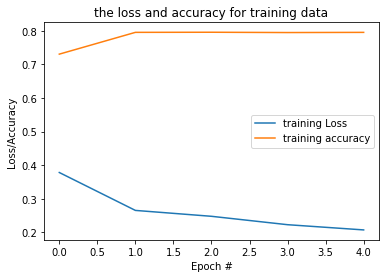

In [16]:
#plot the loss and accuracy for both training data 
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.arange(0, 5), history.history["loss"], label="training Loss")
plt.plot(np.arange(0, 5), history.history["acc"], label="training accuracy")
plt.title("the loss and accuracy for training data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

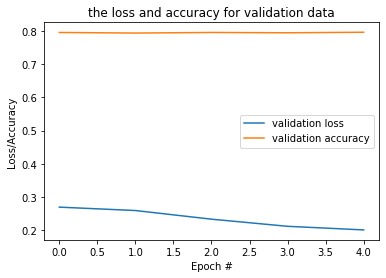

In [17]:
#plot the loss and accuracy for both training data and validation data. 
plt.figure()
plt.plot(np.arange(0, 5), history.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 5), history.history["val_acc"], label="validation accuracy")

plt.title("the loss and accuracy for validation data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

The input image: 


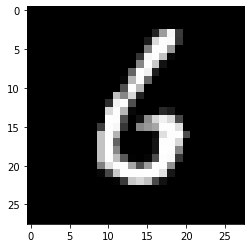

The input image: 


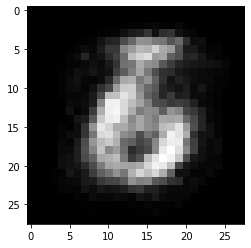

In [23]:






encoded_imgs =  encoder.predict(x_test[[50],:])
decoded_imgs = decoder.predict(encoded_imgs)

print("The input image: ")
plt.imshow(x_test[50].reshape((28, 28)), cmap = 'gray')
plt.show()

print("The input image: ")
plt.imshow(decoded_imgs[0].reshape((28, 28)), cmap = 'gray')
plt.show()